In [ ]:
# # ONLY RUN THIS IF YOU'RE IN GOOGLE COLAB
# from google.colab import drive
# import os

# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/Thesis/Pintu-Air/notebook')

# # Verify you're in the right place
# !pwd
# !ls -la

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Import Data

In [2]:
df = pd.read_csv('01 Result Data Cleaning Part 1.csv')

numeric_columns = [col for col in df.columns if '(air)' in col]
categorical_columns = [col for col in df.columns if '(cuaca)' in col]

In [3]:
df.head()

,Tanggal,ID_Raw,ID_Cleaned,Pukul,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca),...,Pluit (air),Pluit (cuaca),Pasar Ikan (air),Pasar Ikan (cuaca),Cipinang (air),Cipinang (cuaca),Sunter (air),Sunter (cuaca),Pulo Gadung (air),Pulo Gadung (cuaca)
0,16/10/2021,194.0,140,00:00,10.0,Mendung,80.0,Terang,555.0,Terang,...,-190.0,Terang,-190.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
1,16/10/2021,193.0,141,01:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2,16/10/2021,192.0,142,02:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
3,16/10/2021,191.0,143,03:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang,...,-190.0,Terang,140.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
4,16/10/2021,190.0,144,04:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang,...,-190.0,Terang,146.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31224 entries, 0 to 31223
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tanggal               31224 non-null  object 
 1   ID_Raw                31196 non-null  float64
 2   ID_Cleaned            31224 non-null  int64  
 3   Pukul                 31224 non-null  object 
 4   Katulampa (air)       31190 non-null  float64
 5   Katulampa (cuaca)     31183 non-null  object 
 6   Depok (air)           31194 non-null  float64
 7   Depok (cuaca)         31184 non-null  object 
 8   Manggarai (air)       31193 non-null  float64
 9   Manggarai (cuaca)     31185 non-null  object 
 10  Karet (air)           31194 non-null  float64
 11  Karet (cuaca)         31182 non-null  object 
 12  Krukut (air)          31194 non-null  float64
 13  Krukut (cuaca)        31185 non-null  object 
 14  Pesanggrahan (air)    31194 non-null  float64
 15  Pesanggrahan (cuaca

In [4]:
df.isna().sum()

Tanggal                  0
ID_Raw                  28
ID_Cleaned               0
Pukul                    0
Katulampa (air)         34
Katulampa (cuaca)       41
Depok (air)             30
Depok (cuaca)           40
Manggarai (air)         31
Manggarai (cuaca)       39
Karet (air)             30
Karet (cuaca)           42
Krukut (air)            30
Krukut (cuaca)          39
Pesanggrahan (air)      30
Pesanggrahan (cuaca)    36
Angke (air)             30
Angke (cuaca)           40
Pluit (air)             32
Pluit (cuaca)           45
Pasar Ikan (air)        30
Pasar Ikan (cuaca)      45
Cipinang (air)          32
Cipinang (cuaca)        43
Sunter (air)            31
Sunter (cuaca)          42
Pulo Gadung (air)       35
Pulo Gadung (cuaca)     58
dtype: int64

## Impute Missing Data

In [5]:
df_imputed = df.copy()

In [6]:
for col in numeric_columns:
    # Get the mask of missing values
    missing_mask = df_imputed[col].isna()
    
    # Skip if no missing values
    if not missing_mask.any():
        continue
        
    # Simple imputation with before-after average
    df_imputed[col] = df_imputed[col].fillna(
        (df_imputed[col].shift(1) + df_imputed[col].shift(-1)) / 2
    )

# For categorical columns - use forward fill
categorical_columns = [col for col in df.columns if '(cuaca)' in col]
for col in categorical_columns:
    df_imputed[col] = df_imputed[col].ffill()

In [7]:
df_imputed.isna().sum()

Tanggal                  0
ID_Raw                  28
ID_Cleaned               0
Pukul                    0
Katulampa (air)          0
Katulampa (cuaca)        0
Depok (air)              0
Depok (cuaca)            0
Manggarai (air)          0
Manggarai (cuaca)        0
Karet (air)              0
Karet (cuaca)            0
Krukut (air)             0
Krukut (cuaca)           0
Pesanggrahan (air)       0
Pesanggrahan (cuaca)     0
Angke (air)              0
Angke (cuaca)            0
Pluit (air)              0
Pluit (cuaca)            0
Pasar Ikan (air)         0
Pasar Ikan (cuaca)       0
Cipinang (air)           0
Cipinang (cuaca)         0
Sunter (air)             0
Sunter (cuaca)           0
Pulo Gadung (air)        0
Pulo Gadung (cuaca)      0
dtype: int64

## Convert 'Tanggal' to Datetime

In [8]:
df_cleaned = df_imputed.copy()
df_cleaned['Tanggal'] = pd.to_datetime(df_cleaned['Tanggal']+" "+ df_cleaned['Pukul'], dayfirst=True)
df_cleaned.drop('Pukul', axis=1, inplace=True)
df_cleaned.set_index('Tanggal', inplace=True)
df_cleaned.head()

,ID_Raw,ID_Cleaned,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca),Karet (air),Karet (cuaca),...,Pluit (air),Pluit (cuaca),Pasar Ikan (air),Pasar Ikan (cuaca),Cipinang (air),Cipinang (cuaca),Sunter (air),Sunter (cuaca),Pulo Gadung (air),Pulo Gadung (cuaca)
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-10-16 00:00:00,194.0,140,10.0,Mendung,80.0,Terang,555.0,Terang,25.0,Terang,...,-190.0,Terang,-190.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 01:00:00,193.0,141,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 02:00:00,192.0,142,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 03:00:00,191.0,143,10.0,Mendung Tipis,90.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,140.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 04:00:00,190.0,144,10.0,Mendung Tipis,90.0,Terang,560.0,Terang,250.0,Terang,...,-190.0,Terang,146.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang


## Only take Katulampa, Depok, and Manggarai

In [9]:
df_final = df_cleaned[['Katulampa (air)', 'Katulampa (cuaca)', 'Depok (air)', 'Depok (cuaca)', 'Manggarai (air)', 'Manggarai (cuaca)']]
df_final.head()

,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca)
Tanggal,,,,,,
2021-10-16 00:00:00,10.0,Mendung,80.0,Terang,555.0,Terang
2021-10-16 01:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 02:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 03:00:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang
2021-10-16 04:00:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang


In [10]:
del df, df_imputed, df_cleaned, numeric_columns, categorical_columns

# Exploratory Data Analysis

## Correlation Between Pintu Air

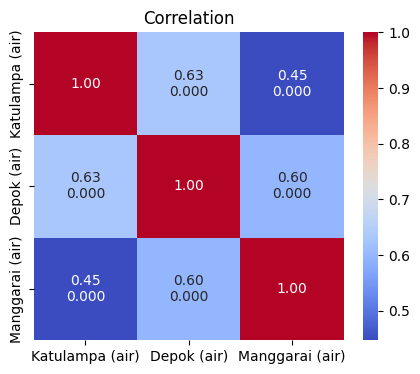

In [11]:
numeric_columns = [col for col in df_final.columns if '(air)' in col]

corr = df_final[numeric_columns].corr()

# Calculate p-values and create simple annotations
annot = np.empty_like(corr, dtype=object)
for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        r = corr.iloc[i,j]
        
        # Display correlation value with 2 decimal places
        if i == j:
            annot[i,j] = f'{r:.2f}'
        else:
            p = pearsonr(df_final[numeric_columns[i]], 
                            df_final[numeric_columns[j]])

            # Show correlation on top line, p-value on bottom line
            annot[i,j] = f'{r:.2f}\n{p.pvalue:.3f}'

# Clean the column labels
clean_labels = [col.replace(' (air)', '') for col in numeric_columns]

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=annot, fmt='', cmap='coolwarm')
plt.title('Correlation')
plt.show()

## Time Series Plot

In [12]:
def ts_plot(data, col):
    plt.figure(figsize=(20, 6))
    plt.plot(data.index, data[col])
    plt.title(col)
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

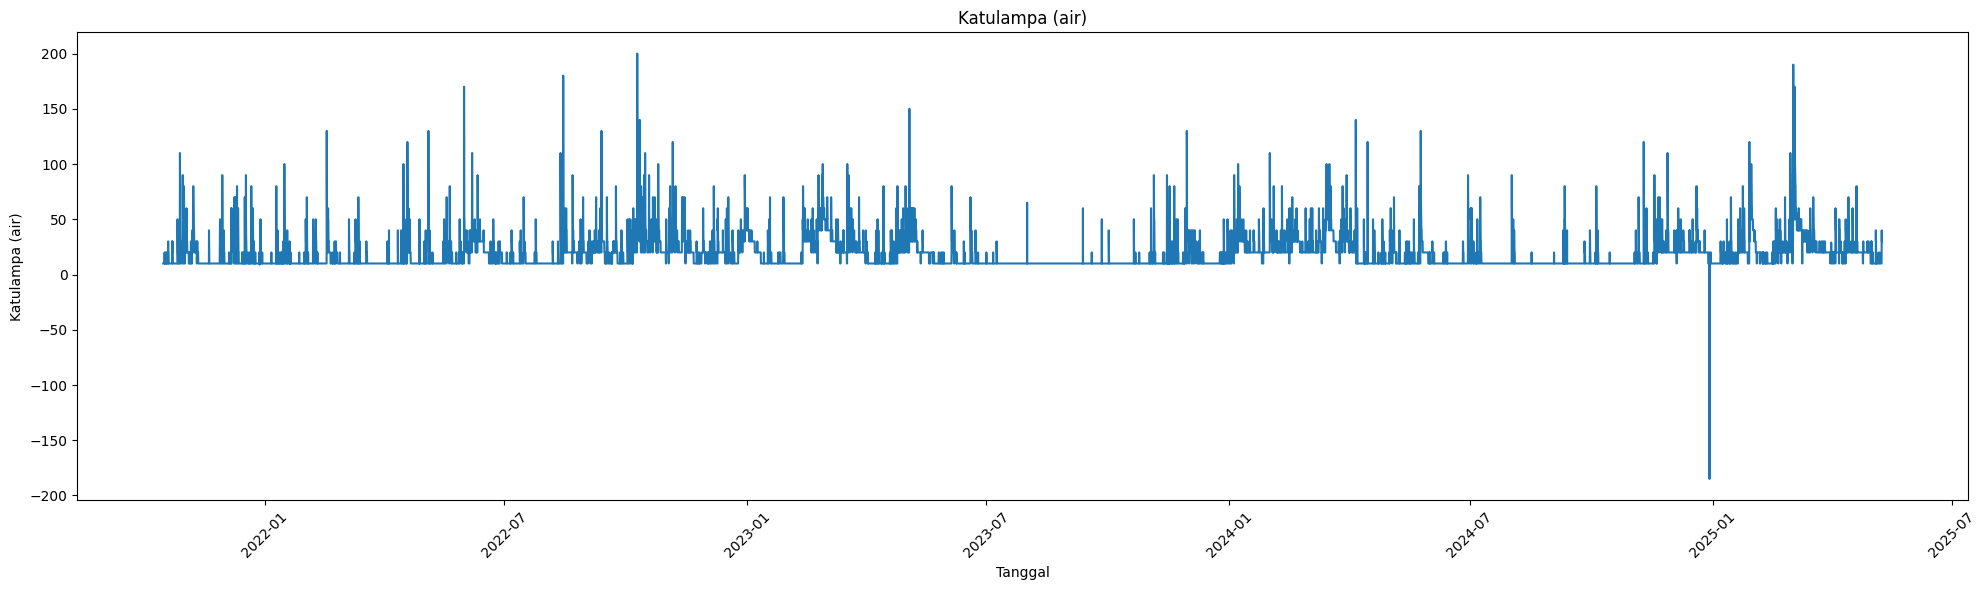

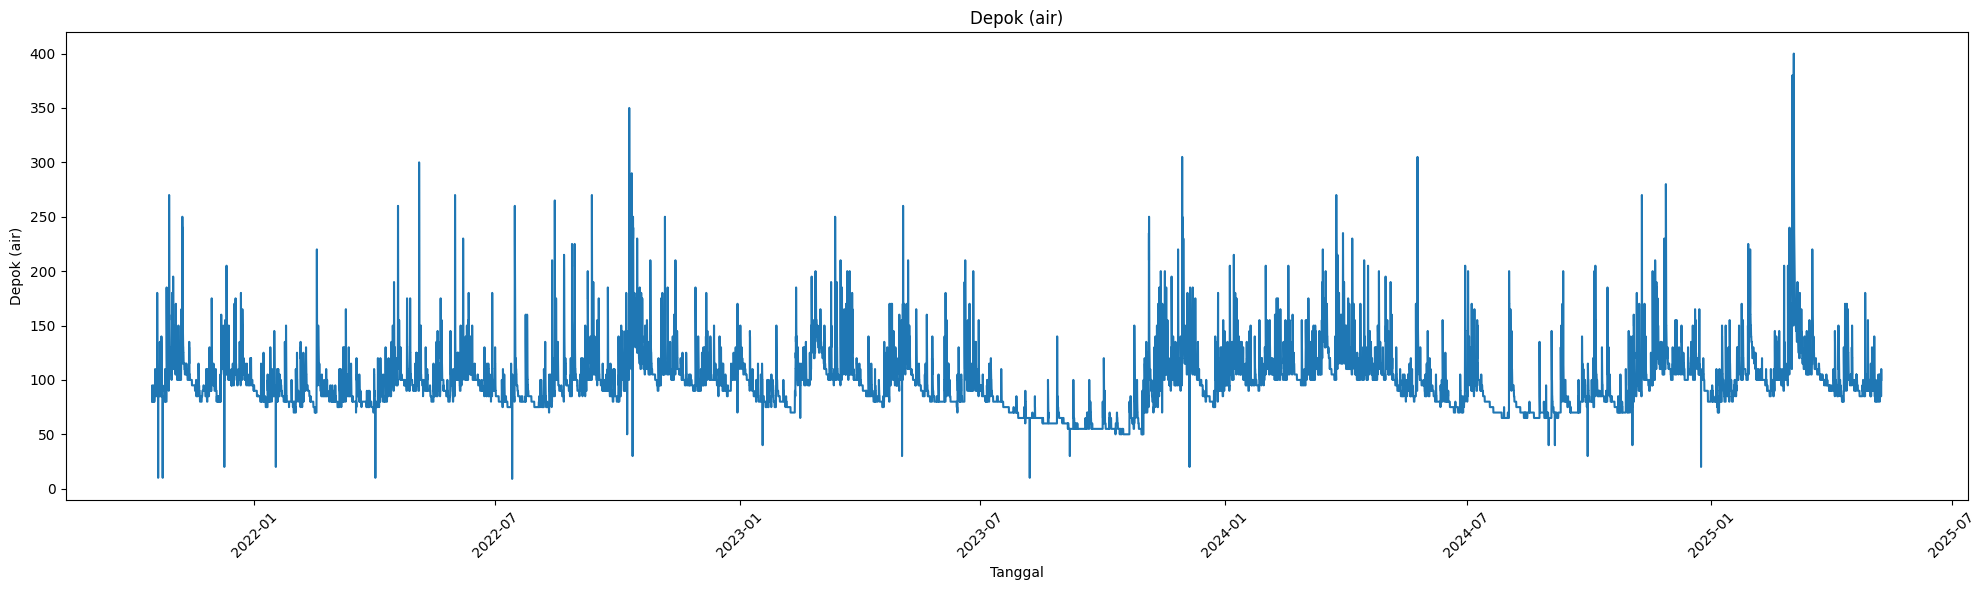

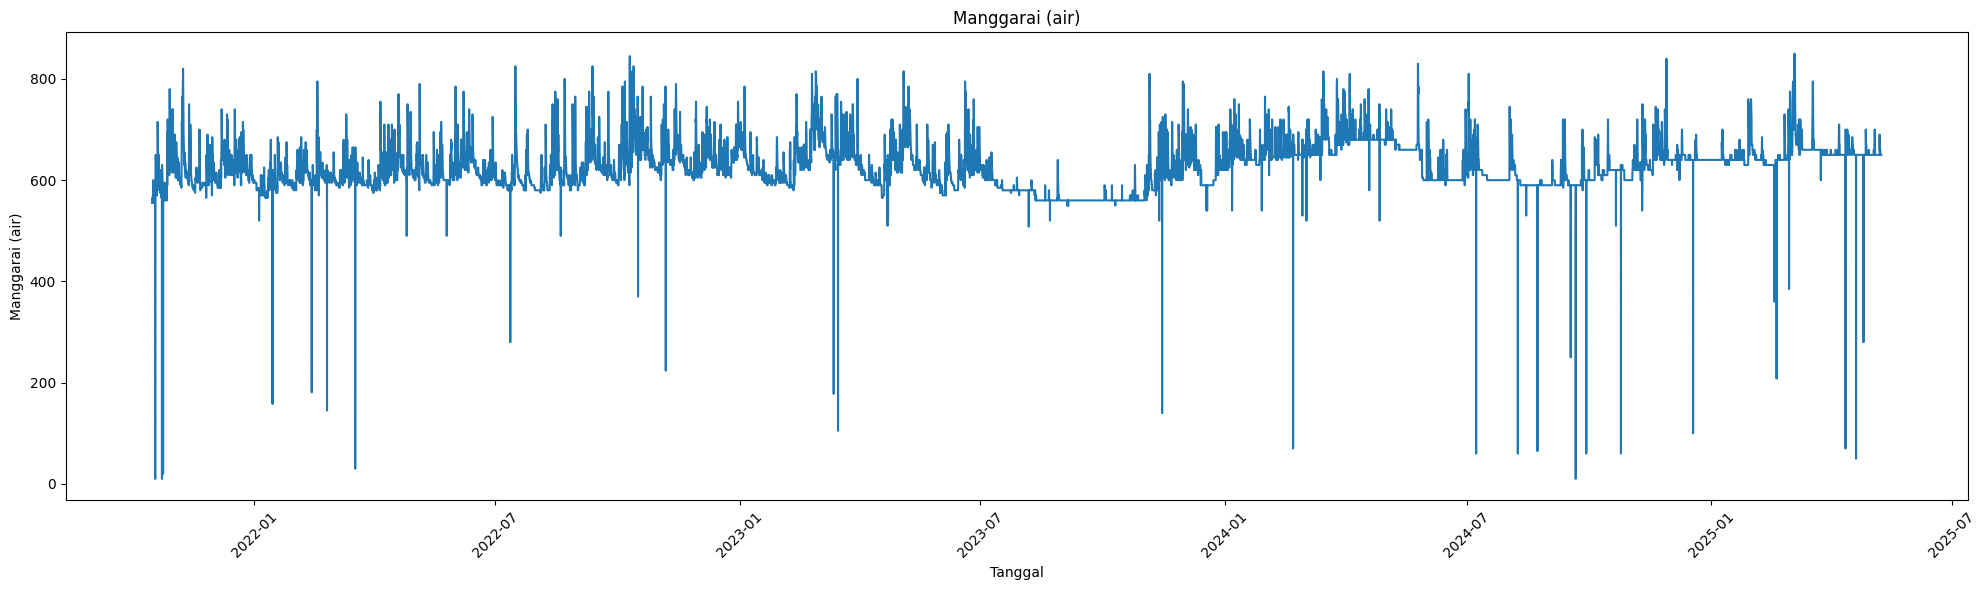

In [13]:
for i in range(len(numeric_columns)):
    ts_plot(df_final, numeric_columns[i])

In [14]:
df_final_cleaned = df_final.copy()

def impute(col, min_val):
    # Get the actual index values instead of using integer positions
    indices = df_final_cleaned.index.tolist()
    
    for i, idx in enumerate(indices):
        if df_final_cleaned.at[idx, col] < min_val:
            if i == 0:
                # First row: use next row's value
                df_final_cleaned.at[idx, col] = df_final_cleaned.at[indices[i + 1], col]
            elif i == len(indices) - 1:  # Fixed: was missing -1
                # Last row: use previous row's value
                df_final_cleaned.at[idx, col] = df_final_cleaned.at[indices[i - 1], col]
            else:
                # Middle rows: use average of adjacent values
                prev_val = df_final_cleaned.at[indices[i - 1], col]
                next_val = df_final_cleaned.at[indices[i + 1], col]
                df_final_cleaned.at[idx, col] = (prev_val + next_val) / 2

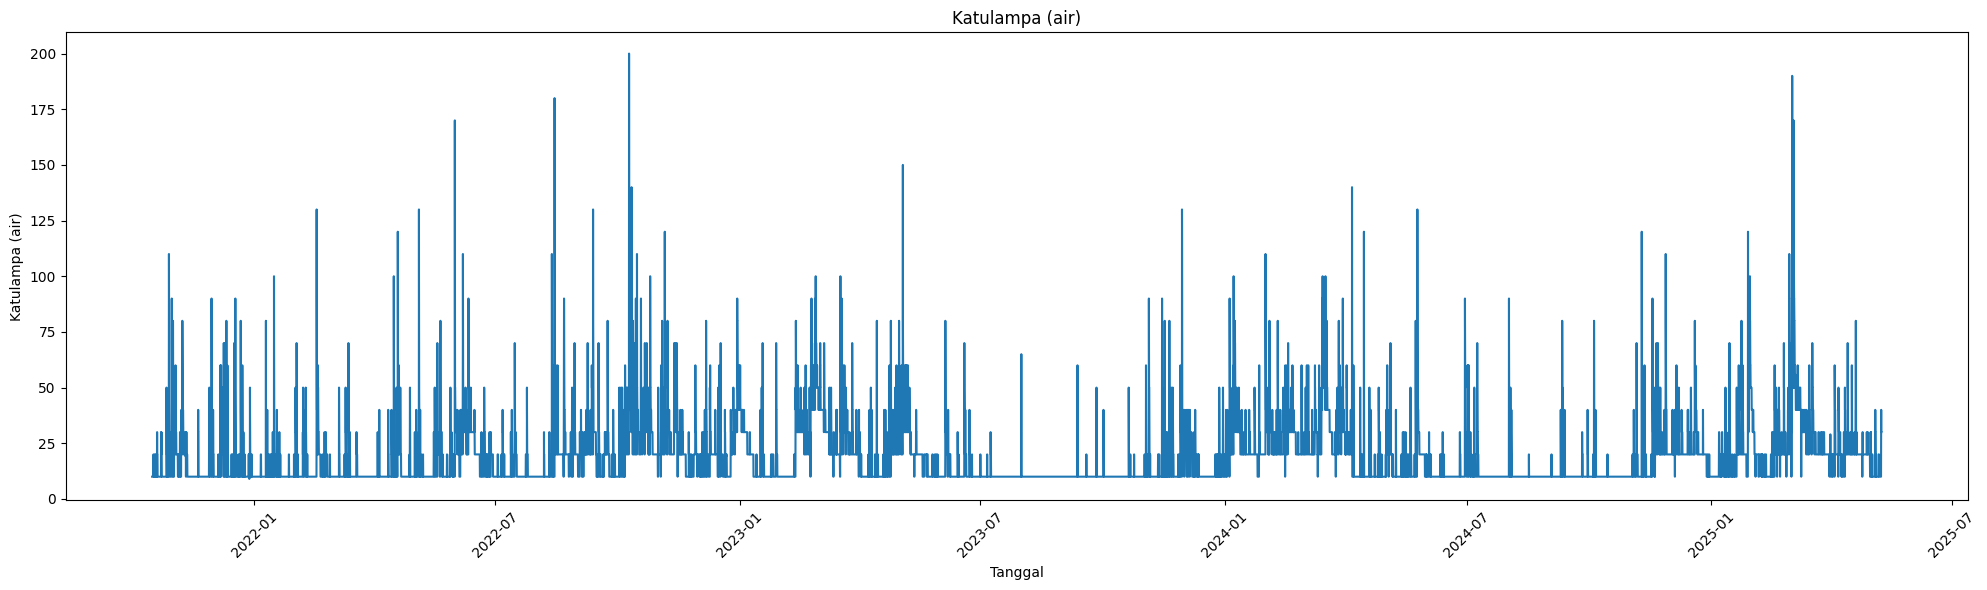

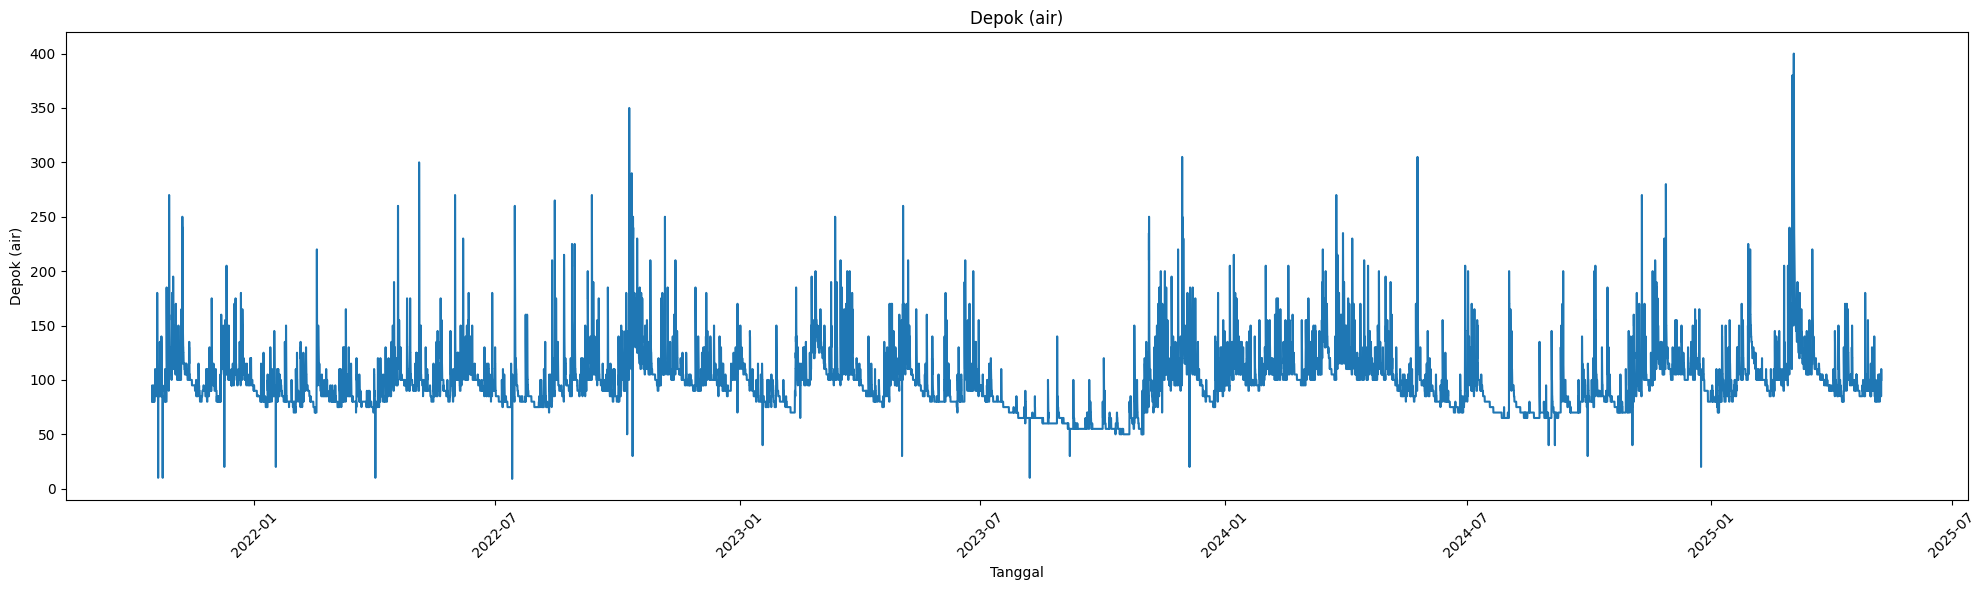

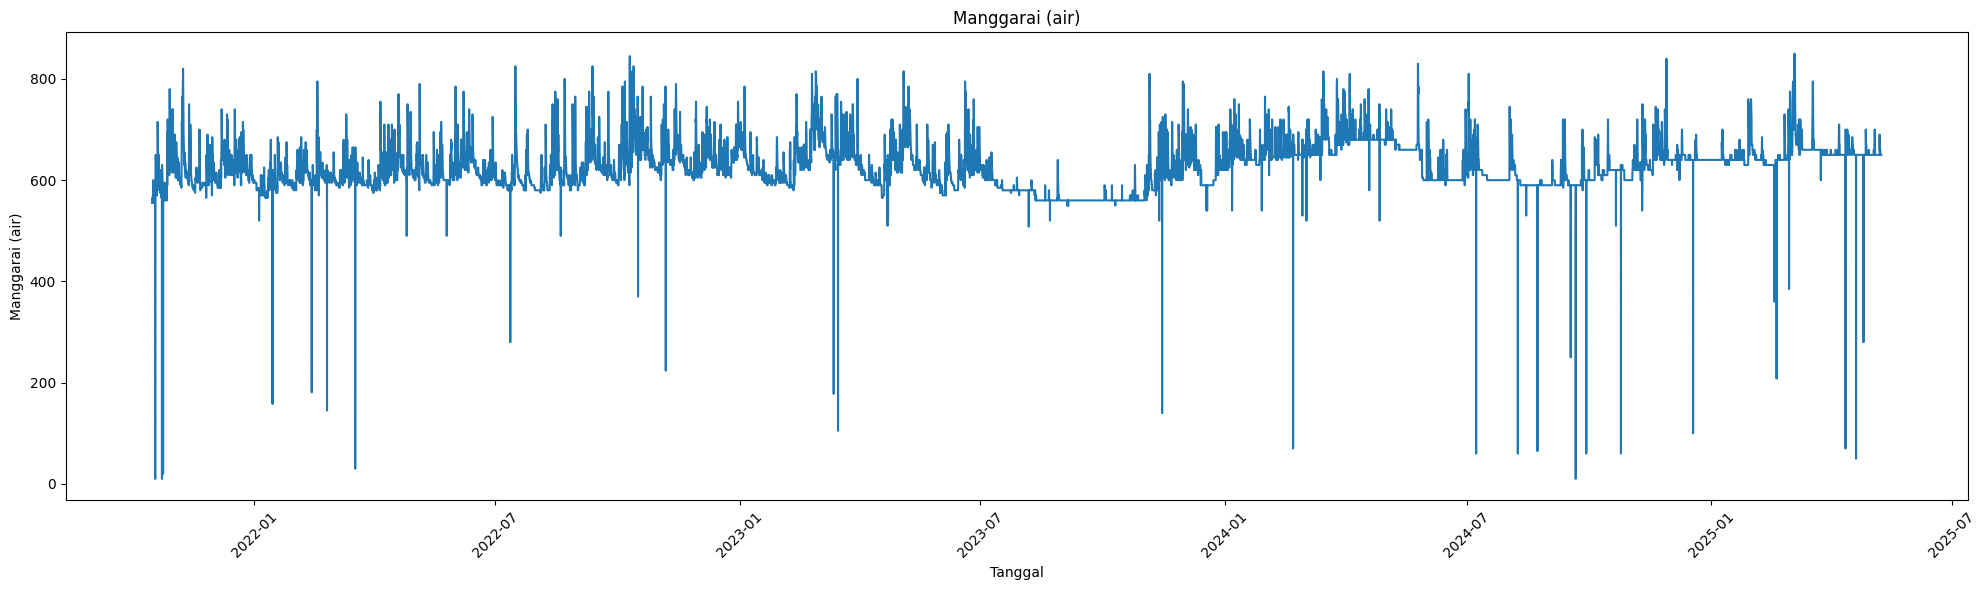

In [15]:
for col in numeric_columns:
    impute(col, 0)
    ts_plot(df_final_cleaned, col)

In [18]:
df_final_cleaned.to_csv('02 All Data.csv')

## Boxplot

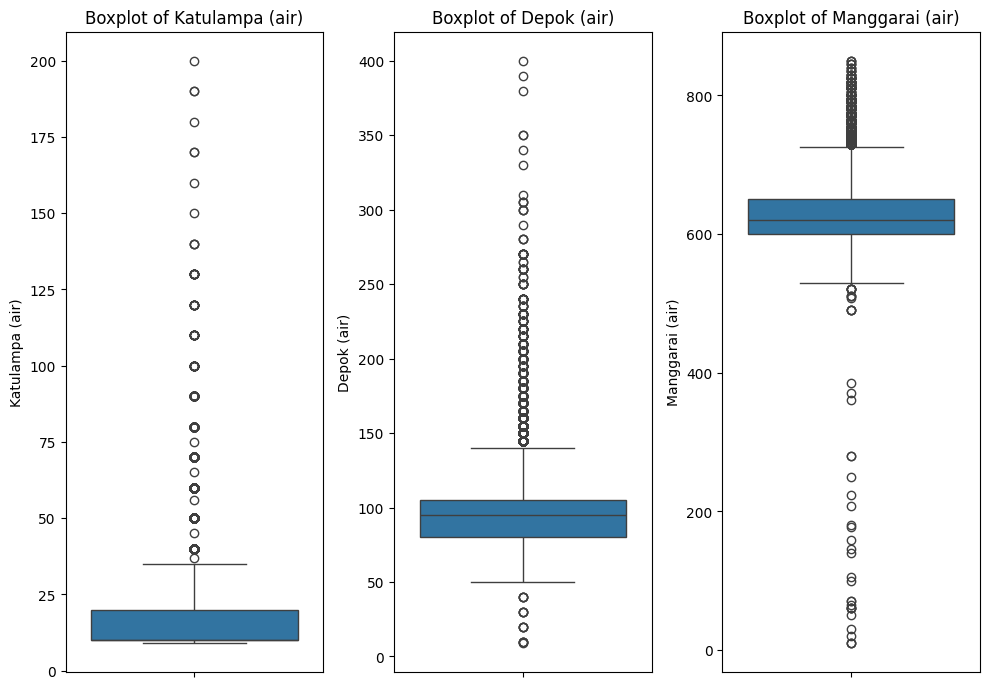

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7))

# Create boxplots for the 3 numeric columns
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_final_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Statistik Deskriptif

In [34]:
data_list = []
locations = ['Katulampa', 'Depok', 'Manggarai']

for tanggal, row in df_final_cleaned.iterrows():
    for location in locations:
        air_col = f"{location} (air)"
        cuaca_col = f"{location} (cuaca)"
        
        if pd.notna(row[air_col]) and pd.notna(row[cuaca_col]):
            data_list.append({
                'Location': location,
                'Tinggi_Air': row[air_col],
                'Cuaca': row[cuaca_col]
            })

# Buat dataframe baru
df_long = pd.DataFrame(data_list)

for location in locations:
    location_data = df_long[df_long['Location'] == location]
    
    # Overall average untuk lokasi ini
    overall_avg = location_data['Tinggi_Air'].mean()
    
    # Breakdown per cuaca
    cuaca_stats = location_data.groupby('Cuaca')['Tinggi_Air'].agg(['mean', 'std', 'count', 'min', 'max'])
    
    for cuaca in cuaca_stats.index:
        mean_val = cuaca_stats.loc[cuaca, 'mean']

# Buat tabel yang lebih lengkap dengan quartiles
result_table = []

for location in locations:
    location_data = df_long[df_long['Location'] == location]
    
    # Overall stats untuk lokasi
    overall_stats = location_data['Tinggi_Air'].describe()
    result_table.append({
        'Location': location,
        'Cuaca': 'TOTAL',
        'Count': int(overall_stats['count']),
        'Mean': overall_stats['mean'],
        'Std': overall_stats['std'],
        'Min': overall_stats['min'],
        'Q1 (25%)': overall_stats['25%'],
        'Q2 (Median)': overall_stats['50%'],
        'Q3 (75%)': overall_stats['75%'],
        'Max': overall_stats['max'],
        'Range': overall_stats['max'] - overall_stats['min'],
        'IQR': overall_stats['75%'] - overall_stats['25%']
    })
    
    # Stats per cuaca
    cuaca_groups = location_data.groupby('Cuaca')['Tinggi_Air']
    
    for cuaca in cuaca_groups.groups.keys():
        cuaca_data = cuaca_groups.get_group(cuaca)
        cuaca_stats = cuaca_data.describe()
        
        result_table.append({
            'Location': '',
            'Cuaca': cuaca,
            'Count': int(cuaca_stats['count']),
            'Mean': cuaca_stats['mean'],
            'Std': cuaca_stats['std'],
            'Min': cuaca_stats['min'],
            'Q1 (25%)': cuaca_stats['25%'],
            'Q2 (Median)': cuaca_stats['50%'],
            'Q3 (75%)': cuaca_stats['75%'],
            'Max': cuaca_stats['max'],
            'Range': cuaca_stats['max'] - cuaca_stats['min'],
            'IQR': cuaca_stats['75%'] - cuaca_stats['25%']
        })

# Convert ke DataFrame dan tampilkan
result_df = pd.DataFrame(result_table)
result_df = result_df.round(4)
result_df

,Location,Cuaca,Count,Mean,Std,Min,Q1 (25%),Q2 (Median),Q3 (75%),Max,Range,IQR
0,Katulampa,TOTAL,31224,17.9871,12.6909,9.0,10.0,10.0,20.0,200.0,191.0,10.0
1,,Gerimis,2083,30.0187,22.4461,10.0,10.0,20.0,40.0,200.0,190.0,30.0
2,,Hujan,646,27.5619,23.4731,10.0,10.0,20.0,30.0,170.0,160.0,20.0
3,,Mendung,6191,22.4665,14.6299,9.0,10.0,20.0,30.0,140.0,131.0,20.0
4,,Mendung Tipis,12020,16.1880,9.3746,10.0,10.0,10.0,20.0,100.0,90.0,10.0
5,,Terang,10284,14.3547,7.5339,10.0,10.0,10.0,20.0,80.0,70.0,10.0
6,Depok,TOTAL,31224,96.4743,24.5447,9.0,80.0,95.0,105.0,400.0,391.0,25.0
7,,Gerimis,1347,113.2966,29.2403,55.0,95.0,105.0,125.0,270.0,215.0,30.0
8,,Hujan,548,108.2208,31.2357,60.0,90.0,100.0,115.0,400.0,340.0,25.0
9,,Mendung,4826,109.8812,30.1344,9.0,90.0,105.0,120.0,380.0,371.0,30.0


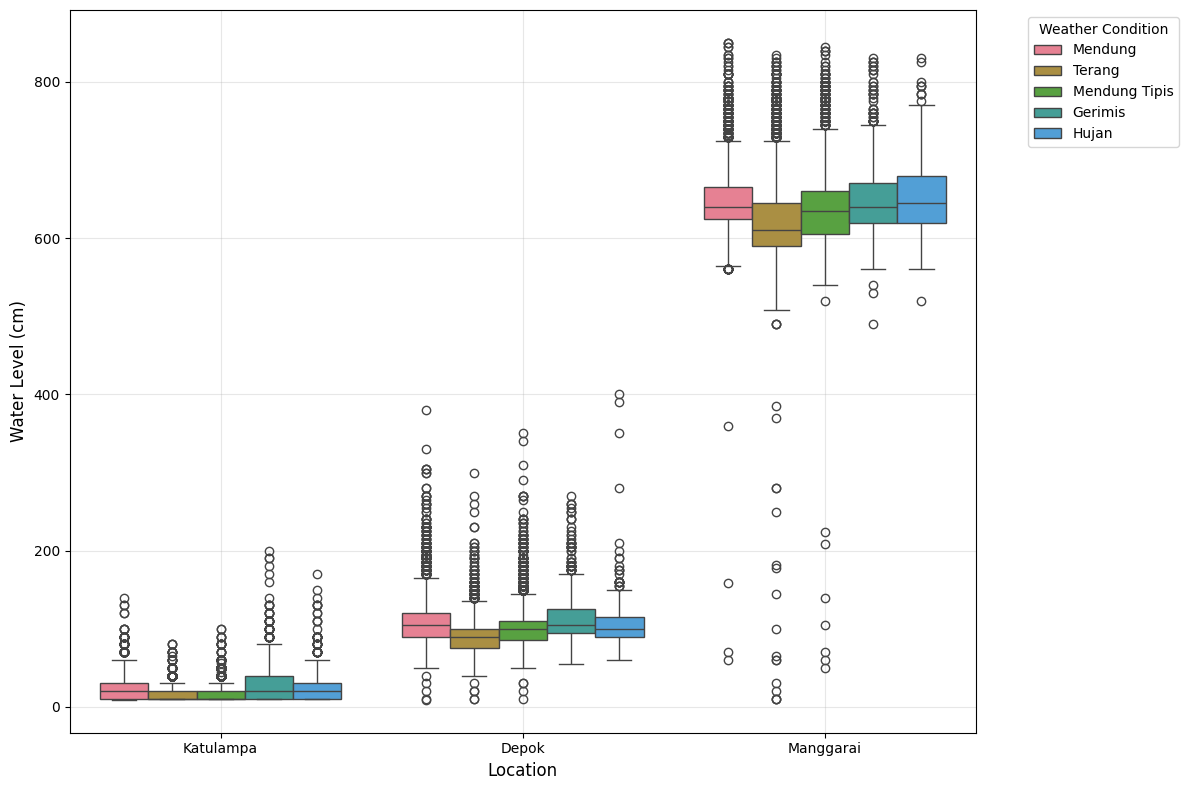

In [31]:
plt.style.use('default')
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_long, x='Location', y='Tinggi_Air', hue='Cuaca')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Water Level (cm)', fontsize=12)
plt.legend(title='Weather Condition', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Cross Correlation to Pintu Air Manggarai

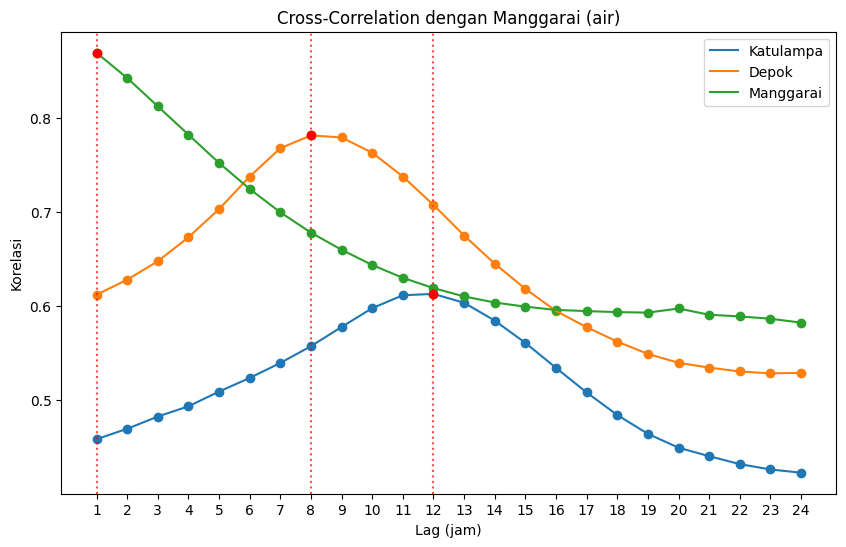

In [18]:
max_lag = 24
cross_corr = {}

for col in ["Katulampa (air)", "Depok (air)", "Manggarai (air)"]:
    corr_lags = []
    for lag in range(1, max_lag+1):
        shifted = df_final_cleaned[col].shift(lag)
        corr = shifted.corr(df_final_cleaned['Manggarai (air)'])
        corr_lags.append((lag, corr))
    cross_corr[col] = corr_lags

plt.figure(figsize=(10, 6))

for col in ["Katulampa (air)", "Depok (air)", "Manggarai (air)"]:
    lags, corrs = zip(*cross_corr[col])
    plt.plot(lags, corrs, label=col.replace(" (air)", ""))
    plt.scatter(lags, corrs)

    # Highlight maximum correlation point
    max_idx = corrs.index(max(corrs))
    max_lag = lags[max_idx]
    max_corr = corrs[max_idx]
    plt.axvline(x=max_lag, color="red", linestyle=":", alpha=0.7)
    plt.scatter([max_lag], [max_corr], color="red", zorder=5)

# Add guideline for every one lag
plt.xticks(lags)

plt.title("Cross-Correlation dengan Manggarai (air)")
plt.xlabel("Lag (jam)")
plt.ylabel("Korelasi")
plt.legend()
plt.show()

In [19]:
df_final_cleaned.head()

,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca)
Tanggal,,,,,,
2021-10-16 00:00:00,10.0,Mendung,80.0,Terang,555.0,Terang
2021-10-16 01:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 02:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 03:00:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang
2021-10-16 04:00:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang


## Decompose Manggarai

In [41]:
def plot_decompose(decomposition):
    # Create the decomposition plot
    fig, axes = plt.subplots(4, 1, figsize=(19, 10))

    # Original time series
    axes[0].plot(decomposition.observed.index, decomposition.observed.values,
                color='blue', linewidth=0.8)
    axes[0].set_title('Original Time Series')
    axes[0].set_ylabel('Water Level')
    axes[0].grid(True, alpha=0.3)

    # Trend component
    axes[1].plot(decomposition.trend.index, decomposition.trend.values,
                color='red', linewidth=1.2)
    axes[1].set_title('Trend Component')
    axes[1].set_ylabel('Trend')
    axes[1].grid(True, alpha=0.3)

    # Seasonal component
    axes[2].plot(decomposition.seasonal.index, decomposition.seasonal.values,
                color='green', linewidth=0.8)
    axes[2].set_title('Seasonal Component (24-hour cycle)')
    axes[2].set_ylabel('Seasonal')
    axes[2].grid(True, alpha=0.3)

    # Residual component
    axes[3].plot(decomposition.resid.index, decomposition.resid.values,
                color='purple', linewidth=0.8)
    axes[3].set_title('Residual Component')
    axes[3].set_ylabel('Residuals')
    axes[3].set_xlabel('Date')
    axes[3].grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    # Plot the 20 days seasonal component
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(decomposition.seasonal.head(480), color='green')
    ax.set_title('Seasonal Component (20 days)')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

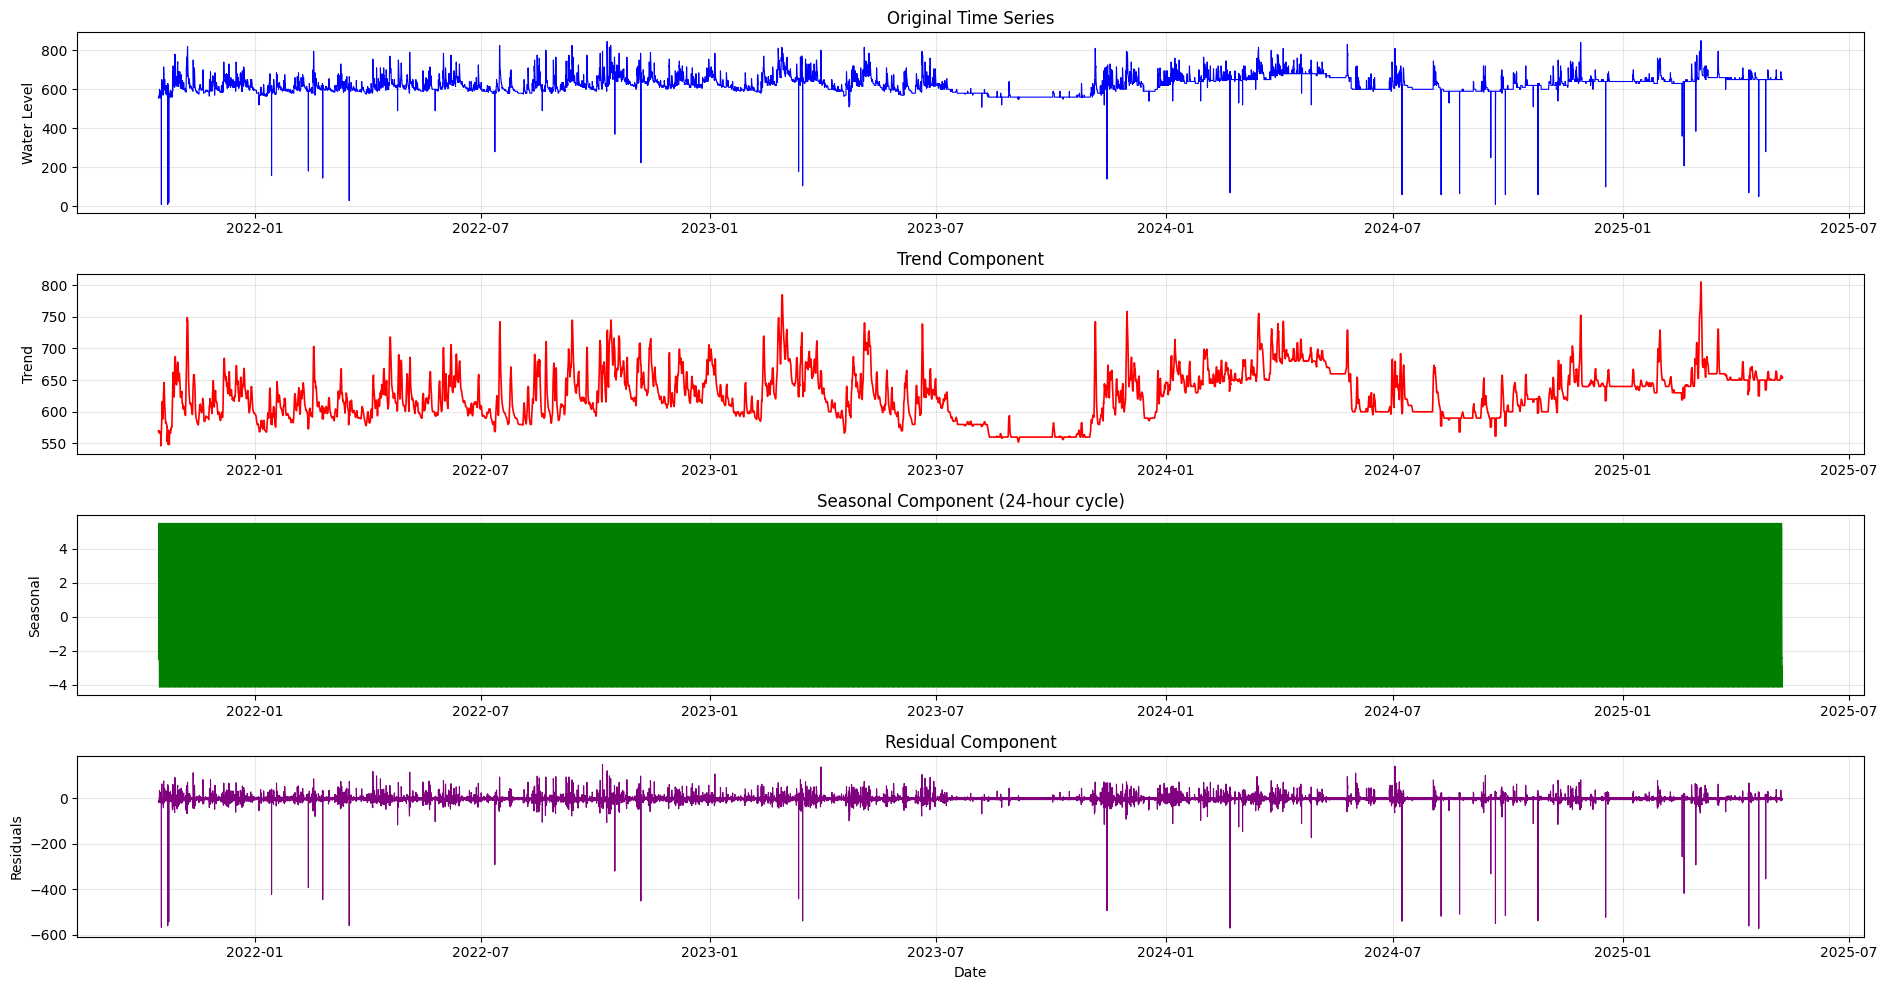

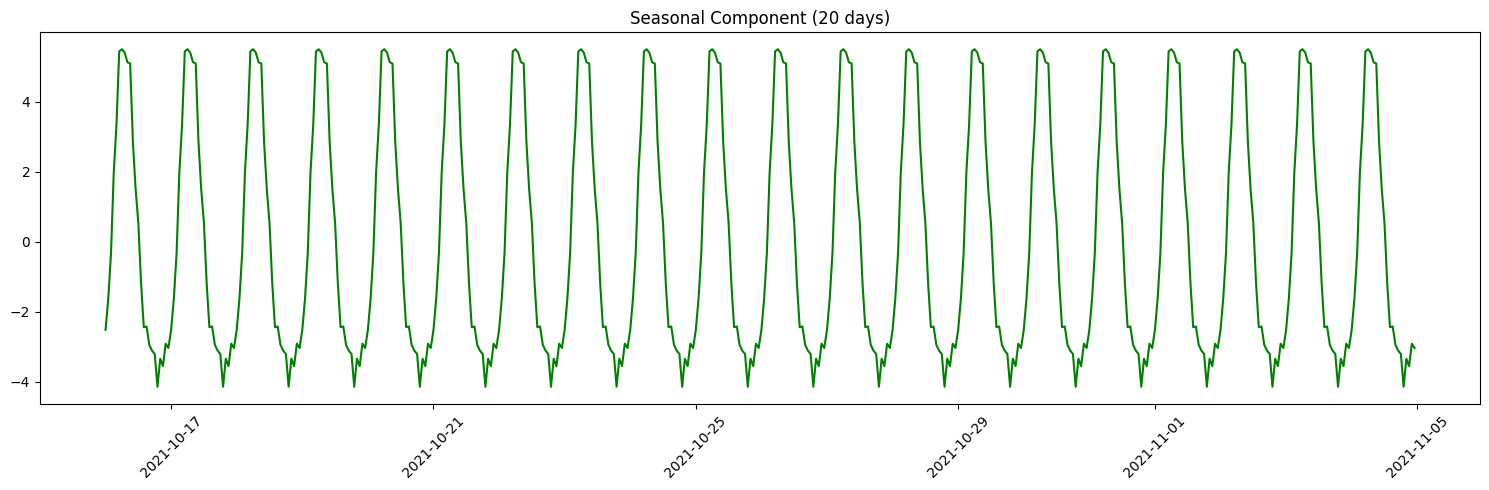

In [42]:
period = 24

decomposition = seasonal_decompose(
    df_final_cleaned['Manggarai (air)'],
    model='additive',
    period=period,
    extrapolate_trend='freq'
)
plot_decompose(decomposition)

# Time Series Regression

In [137]:
df_reg = pd.DataFrame(index=df_final_cleaned.index)

df_reg['time_index'] = np.arange(len(df_final_cleaned))
# Daily Seasonality (based on the hour of the day)
df_reg['hour_sin'] = np.sin(2 * np.pi * df_reg.index.hour / 24)
df_reg['hour_cos'] = np.cos(2 * np.pi * df_reg.index.hour / 24)

# Weekly Seasonality (based on the day of the week)
# Note: df.index.dayofweek treats Monday as 0 and Sunday as 6
df_reg['dayofweek_sin'] = np.sin(2 * np.pi * df_reg.index.dayofweek / 7)
df_reg['dayofweek_cos'] = np.cos(2 * np.pi * df_reg.index.dayofweek / 7)

# Yearly Seasonality (based on the day of the year)
# Using 365.25 helps to average over leap years for more consistency
df_reg['dayofyear_sin'] = np.sin(2 * np.pi * df_reg.index.dayofyear / 365.25)
df_reg['dayofyear_cos'] = np.cos(2 * np.pi * df_reg.index.dayofyear / 365.25)

# Create all lags
dfs_list = []
for col in ['Manggarai', 'Depok', 'Katulampa']:
    for i in range(0, 25):
        if(i==0):
            air_lag = df_final_cleaned[f'{col} (air)'].shift(i).to_frame(f'{col.lower()}_air')
            cuaca_lag = df_final_cleaned[f'{col} (cuaca)'].shift(i).to_frame(f'{col.lower()}_cuaca')
        else:
            air_lag = df_final_cleaned[f'{col} (air)'].shift(i).to_frame(f'{col.lower()}_air_lag{i}')
            cuaca_lag = df_final_cleaned[f'{col} (cuaca)'].shift(i).to_frame(f'{col.lower()}_cuaca_lag{i}')

        dfs_list.append(air_lag)
        dfs_list.append(cuaca_lag)

# Combine everything at once
df_reg = pd.concat([df_reg] + dfs_list, axis=1)
df_reg.head()

,time_index,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,dayofyear_sin,dayofyear_cos,manggarai_air,manggarai_cuaca,manggarai_air_lag1,...,katulampa_air_lag20,katulampa_cuaca_lag20,katulampa_air_lag21,katulampa_cuaca_lag21,katulampa_air_lag22,katulampa_cuaca_lag22,katulampa_air_lag23,katulampa_cuaca_lag23,katulampa_air_lag24,katulampa_cuaca_lag24
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-10-16 00:00:00,0,0.000000,1.000000,-0.974928,-0.222521,-0.966618,0.256222,555.0,Terang,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 01:00:00,1,0.258819,0.965926,-0.974928,-0.222521,-0.966618,0.256222,555.0,Terang,555.0,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 02:00:00,2,0.500000,0.866025,-0.974928,-0.222521,-0.966618,0.256222,555.0,Terang,555.0,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 03:00:00,3,0.707107,0.707107,-0.974928,-0.222521,-0.966618,0.256222,555.0,Terang,555.0,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 04:00:00,4,0.866025,0.500000,-0.974928,-0.222521,-0.966618,0.256222,560.0,Terang,555.0,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None


In [138]:
# One-hot encode all cuaca columns and drop 'Terang' column
cuaca_columns = [col for col in df_reg.columns if 'cuaca' in col]

for cuaca_col in cuaca_columns:
    # Create one-hot encoding for this cuaca column
    dummies = pd.get_dummies(df_reg[cuaca_col], prefix=cuaca_col, drop_first=False, dtype=int)
    
    # Drop 'Terang' column if it exists
    terang_col = f'{cuaca_col}_Terang'
    if terang_col in dummies.columns:
        dummies = dummies.drop(terang_col, axis=1)
    
    # Add dummy columns to dataframe
    df_reg = pd.concat([df_reg, dummies], axis=1)
    
    # Drop original cuaca column
    df_reg = df_reg.drop(cuaca_col, axis=1)

In [139]:
df_reg.isna().sum()

time_index                             0
hour_sin                               0
hour_cos                               0
dayofweek_sin                          0
dayofweek_cos                          0
                                      ..
katulampa_cuaca_lag23_Mendung Tipis    0
katulampa_cuaca_lag24_Gerimis          0
katulampa_cuaca_lag24_Hujan            0
katulampa_cuaca_lag24_Mendung          0
katulampa_cuaca_lag24_Mendung Tipis    0
Length: 382, dtype: int64

In [144]:
# Remove rows with NaN values
df_reg_clean = df_reg.iloc[24:]

In [145]:
df_reg_clean.isna().sum()

time_index                             0
hour_sin                               0
hour_cos                               0
dayofweek_sin                          0
dayofweek_cos                          0
                                      ..
katulampa_cuaca_lag23_Mendung Tipis    0
katulampa_cuaca_lag24_Gerimis          0
katulampa_cuaca_lag24_Hujan            0
katulampa_cuaca_lag24_Mendung          0
katulampa_cuaca_lag24_Mendung Tipis    0
Length: 382, dtype: int64

In [146]:
# Define target variable
target = df_reg_clean['manggarai_air']

# Define feature variables
feature_cols = [col for col in df_reg_clean.columns if col != 'manggarai_air']
features = df_reg_clean[feature_cols]

In [147]:
n_total = len(df_reg_clean)
train_size = int(n_total * 0.95)

X_train = features.iloc[:train_size]
y_train = target.iloc[:train_size]
X_test = features.iloc[train_size:]
y_test = target.iloc[train_size:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 29640
Test set size: 1560


In [148]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit OLS regression
model_reg = sm.OLS(y_train, X_train_const).fit()

# Print complete regression output (like R summary)
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          manggarai_air   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     412.9
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:11:44   Log-Likelihood:            -1.2769e+05
No. Observations:               29640   AIC:                         2.561e+05
Df Residuals:                   29258   BIC:                         2.593e+05
Df Model:                         381                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

# Time Series Regression 2

In [149]:
del df_reg, df_reg_clean, X_train, X_test, y_train, y_test, X_train_const, X_test_const

In [150]:
def create_lag(df, col, lags, output_list):
    for i in lags:
        if(i==0):
            air_lag = df[f'{col} (air)'].shift(i).to_frame(f'{col.lower()}_air')
            cuaca_lag = df[f'{col} (cuaca)'].shift(i).to_frame(f'{col.lower()}_cuaca')
        else:
            air_lag = df[f'{col} (air)'].shift(i).to_frame(f'{col.lower()}_air_lag{i}')
            cuaca_lag = df[f'{col} (cuaca)'].shift(i).to_frame(f'{col.lower()}_cuaca_lag{i}')

        output_list.append(air_lag)
        output_list.append(cuaca_lag)
    
    return output_list

In [151]:
df_reg = pd.DataFrame(index=df_final_cleaned.index)

df_reg['time_index'] = np.arange(len(df_final_cleaned))
# Daily Seasonality (based on the hour of the day)
df_reg['hour_sin'] = np.sin(2 * np.pi * df_reg.index.hour / 24)
df_reg['hour_cos'] = np.cos(2 * np.pi * df_reg.index.hour / 24)

# Create all lags
dfs_list = []
dfs_list = create_lag(df_final_cleaned, 'Manggarai', range(0, 7), dfs_list)
dfs_list = create_lag(df_final_cleaned, 'Depok', range(6, 10), dfs_list)
dfs_list = create_lag(df_final_cleaned, 'Katulampa', range(11, 14), dfs_list)

# Combine everything at once
df_reg = pd.concat([df_reg] + dfs_list, axis=1)
df_reg.head()

,time_index,hour_sin,hour_cos,manggarai_air,manggarai_cuaca,manggarai_air_lag1,manggarai_cuaca_lag1,manggarai_air_lag2,manggarai_cuaca_lag2,manggarai_air_lag3,...,depok_air_lag8,depok_cuaca_lag8,depok_air_lag9,depok_cuaca_lag9,katulampa_air_lag11,katulampa_cuaca_lag11,katulampa_air_lag12,katulampa_cuaca_lag12,katulampa_air_lag13,katulampa_cuaca_lag13
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-10-16 00:00:00,0,0.000000,1.000000,555.0,Terang,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 01:00:00,1,0.258819,0.965926,555.0,Terang,555.0,Terang,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 02:00:00,2,0.500000,0.866025,555.0,Terang,555.0,Terang,555.0,Terang,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 03:00:00,3,0.707107,0.707107,555.0,Terang,555.0,Terang,555.0,Terang,555.0,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2021-10-16 04:00:00,4,0.866025,0.500000,560.0,Terang,555.0,Terang,555.0,Terang,555.0,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None


In [152]:
# One-hot encode all cuaca columns and drop 'Terang' column
cuaca_columns_to_process = [col for col in df_reg.columns if 'cuaca' in col]
columns_to_drop = []

for cuaca_col in cuaca_columns_to_process:
    # Create a new binary column for 'Hujan' or 'Gerimis'
    df_reg[f'{cuaca_col}_hujan'] = df_reg[cuaca_col].isin(['Hujan', 'Gerimis']).astype(int)
    # Add the original 'cuaca' column to the list of columns to be dropped
    columns_to_drop.append(cuaca_col)

# Drop the original string-based 'cuaca' columns
df_reg = df_reg.drop(columns=columns_to_drop)

In [153]:
df_reg.isna().sum()

time_index                      0
hour_sin                        0
hour_cos                        0
manggarai_air                   0
manggarai_air_lag1              1
manggarai_air_lag2              2
manggarai_air_lag3              3
manggarai_air_lag4              4
manggarai_air_lag5              5
manggarai_air_lag6              6
depok_air_lag6                  6
depok_air_lag7                  7
depok_air_lag8                  8
depok_air_lag9                  9
katulampa_air_lag11            11
katulampa_air_lag12            12
katulampa_air_lag13            13
manggarai_cuaca_hujan           0
manggarai_cuaca_lag1_hujan      0
manggarai_cuaca_lag2_hujan      0
manggarai_cuaca_lag3_hujan      0
manggarai_cuaca_lag4_hujan      0
manggarai_cuaca_lag5_hujan      0
manggarai_cuaca_lag6_hujan      0
depok_cuaca_lag6_hujan          0
depok_cuaca_lag7_hujan          0
depok_cuaca_lag8_hujan          0
depok_cuaca_lag9_hujan          0
katulampa_cuaca_lag11_hujan     0
katulampa_cuac

In [154]:
# Remove 24 rows as in the Time Series Regression 1 above for consistency
df_reg_clean = df_reg.iloc[24:]

In [155]:
df_reg_clean.isna().sum()

time_index                     0
hour_sin                       0
hour_cos                       0
manggarai_air                  0
manggarai_air_lag1             0
manggarai_air_lag2             0
manggarai_air_lag3             0
manggarai_air_lag4             0
manggarai_air_lag5             0
manggarai_air_lag6             0
depok_air_lag6                 0
depok_air_lag7                 0
depok_air_lag8                 0
depok_air_lag9                 0
katulampa_air_lag11            0
katulampa_air_lag12            0
katulampa_air_lag13            0
manggarai_cuaca_hujan          0
manggarai_cuaca_lag1_hujan     0
manggarai_cuaca_lag2_hujan     0
manggarai_cuaca_lag3_hujan     0
manggarai_cuaca_lag4_hujan     0
manggarai_cuaca_lag5_hujan     0
manggarai_cuaca_lag6_hujan     0
depok_cuaca_lag6_hujan         0
depok_cuaca_lag7_hujan         0
depok_cuaca_lag8_hujan         0
depok_cuaca_lag9_hujan         0
katulampa_cuaca_lag11_hujan    0
katulampa_cuaca_lag12_hujan    0
katulampa_

In [156]:
df_reg_clean.head()

,time_index,hour_sin,hour_cos,manggarai_air,manggarai_air_lag1,manggarai_air_lag2,manggarai_air_lag3,manggarai_air_lag4,manggarai_air_lag5,manggarai_air_lag6,...,manggarai_cuaca_lag4_hujan,manggarai_cuaca_lag5_hujan,manggarai_cuaca_lag6_hujan,depok_cuaca_lag6_hujan,depok_cuaca_lag7_hujan,depok_cuaca_lag8_hujan,depok_cuaca_lag9_hujan,katulampa_cuaca_lag11_hujan,katulampa_cuaca_lag12_hujan,katulampa_cuaca_lag13_hujan
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-10-17 00:00:00,24,0.000000,1.000000,590.0,565.0,565.0,565.0,600.0,585.0,570.0,...,0,0,0,0,0,0,0,0,0,0
2021-10-17 01:00:00,25,0.258819,0.965926,575.0,590.0,565.0,565.0,565.0,600.0,585.0,...,0,0,0,0,0,0,0,0,0,0
2021-10-17 02:00:00,26,0.500000,0.866025,570.0,575.0,590.0,565.0,565.0,565.0,600.0,...,0,0,0,0,0,0,0,0,0,0
2021-10-17 03:00:00,27,0.707107,0.707107,565.0,570.0,575.0,590.0,565.0,565.0,565.0,...,0,0,0,0,0,0,0,0,0,0
2021-10-17 04:00:00,28,0.866025,0.500000,560.0,565.0,570.0,575.0,590.0,565.0,565.0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
# Define target variable
target = df_reg_clean['manggarai_air']

# Define feature variables
feature_cols = [col for col in df_reg_clean.columns if col != 'manggarai_air']
features = df_reg_clean[feature_cols]

In [158]:
n_total = len(df_reg_clean)
train_size = int(n_total * 0.95)

X_train = features.iloc[:train_size]
y_train = target.iloc[:train_size]
X_test = features.iloc[train_size:]
y_test = target.iloc[train_size:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 29640
Test set size: 1560


In [130]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit OLS regression
model_reg = sm.OLS(y_train, X_train_const).fit()

# Print complete regression output (like R summary)
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          manggarai_air   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     4904.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:58:57   Log-Likelihood:            -1.2871e+05
No. Observations:               29650   AIC:                         2.575e+05
Df Residuals:                   29619   BIC:                         2.577e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [159]:
y_train

Tanggal
2021-10-17 00:00:00    590.0
2021-10-17 01:00:00    575.0
2021-10-17 02:00:00    570.0
2021-10-17 03:00:00    565.0
2021-10-17 04:00:00    560.0
                       ...  
2025-03-04 19:00:00    835.0
2025-03-04 20:00:00    830.0
2025-03-04 21:00:00    825.0
2025-03-04 22:00:00    815.0
2025-03-04 23:00:00    800.0
Name: manggarai_air, Length: 29640, dtype: float64

In [ ]:
X_train.to_csv('02 X_train.csv')
X_test.to_csv('02 X_test.csv')
y_train.to_csv('02 y_train.csv')
y_test.to_csv('02 y_test.csv')

: 